# Criando os nomes

In [1]:
import pandas as pd

In [2]:
nomes_f = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-f.json')
nomes_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [3]:
nomes_m = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-m.json')
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [4]:
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
51,JOANA,0,268576,52,F
185,SHEILA,0,85939,186,F
188,POLIANA,0,84237,189,F
36,DEBORA,0,312839,37,F
171,TERESINHA,0,92470,172,F


In [5]:
nomes_m.sample(5)

,nome,regiao,freq,rank,sexo
138,CLEBER,0,102878,139,M
61,CICERO,0,247711,62,M
63,MIGUEL,0,239636,64,M
127,JULIANO,0,114597,128,M
158,EDIVALDO,0,81446,159,M


In [6]:
print('Quantidade de nomes: ' + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [7]:
frames = [nomes_f, nomes_m]

In [8]:
nomes = pd.concat(frames)['nome'].to_frame()
nomes.sample(5)

,nome
85,HELENA
86,MAURO
21,MATEUS
139,OSMAR
178,ELIZANGELA


# Incluindo ID dos alunos

In [9]:
import numpy as np

In [10]:
np.random.seed(123)

In [11]:
total_alunos = len(nomes)
total_alunos

400

In [12]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [13]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [14]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [15]:
nomes.sample(5)

,nome,id_aluno,dominio
84,SEVERINO,78,@dominiodoemail.com.br
0,JOSE,331,@servicodoemail.com
179,IAGO,340,@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br


In [16]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [17]:
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


# Criando a tabela Cursos

In [18]:
!pip3 install html5lib

In [19]:
!pip3 install lxml

In [20]:
import html5lib

In [21]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [22]:
type(cursos)

list

In [23]:
cursos = cursos[0]

In [24]:
type(cursos)

pandas.core.frame.DataFrame

In [25]:
cursos

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


# Alterando o index de cursos

In [26]:
cursos = cursos.rename(columns={'Nome do curso':'nome_do_curso'})
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [27]:
cursos['id'] = cursos.index + 1

In [28]:
cursos

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5
5,PHP com MySql,6
6,.NET para web,7
7,Novas integrações com Java,8
8,TDD com Java,9
9,Código limpo com C#,10


In [29]:
cursos = cursos.set_index('id')
cursos

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


# Matriculando os alunos nos cursos

In [30]:
nomes.sample(5)

,nome,id_aluno,dominio,email
59,ISABEL,83,@dominiodoemail.com.br,isabel@dominiodoemail.com.br
172,REBECA,165,@servicodoemail.com,rebeca@servicodoemail.com
130,JUNIOR,184,@dominiodoemail.com.br,junior@dominiodoemail.com.br
70,JOAQUIM,248,@servicodoemail.com,joaquim@servicodoemail.com
171,VALDEMIR,3,@dominiodoemail.com.br,valdemir@dominiodoemail.com.br


In [31]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [32]:
nomes

,nome,id_aluno,dominio,email,matriculas
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br,2
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com,4
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com,1
3,ANTONIA,156,@dominiodoemail.com.br,antonia@dominiodoemail.com.br,1
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com,1
...,...,...,...,...,...
195,WALTER,231,@dominiodoemail.com.br,walter@dominiodoemail.com.br,2
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com,1
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br,2
198,ALVARO,383,@dominiodoemail.com.br,alvaro@dominiodoemail.com.br,1


In [33]:
nomes.matriculas.describe()

count    400.000000
mean       2.147500
std        1.619352
min        1.000000
25%        1.000000
50%        1.500000
75%        3.000000
max       10.000000
Name: matriculas, dtype: float64

In [34]:
import seaborn as sns

C:\Users\diass\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matriculas', ylabel='Density'>

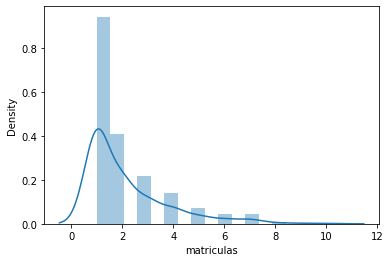

In [35]:
sns.distplot(nomes.matriculas)

In [36]:
nomes.matriculas.value_counts()

1     200
2      87
3      46
4      30
5      15
7       9
6       9
8       2
10      1
9       1
Name: matriculas, dtype: int64

# Selecionando cursos

In [37]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [38]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)
        
matriculas = pd.DataFrame(todas_matriculas, columns=['id_aluno', 'id_curso'])

In [39]:
matriculas

,id_aluno,id_curso
0,235,7
1,235,7
2,43,17
3,43,8
4,43,19
...,...,...
854,383,7
855,366,14
856,366,15
857,366,16


In [40]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,43,Lógica de programação
2,3,Java para Web
3,11,C# para Web
4,28,Ruby on Rails
5,23,Cursos de Python
6,20,PHP com MySql
7,64,.NET para web
8,52,Novas integrações com Java
9,65,TDD com Java


In [41]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

In [42]:
nomes.head()

,nome,id_aluno,dominio,email,matriculas
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br,2
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com,4
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com,1
3,ANTONIA,156,@dominiodoemail.com.br,antonia@dominiodoemail.com.br,1
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com,1


In [43]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [44]:
matriculas.head()

,id_aluno,id_curso
0,235,7
1,235,7
2,43,17
3,43,8
4,43,19


In [45]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,43,Lógica de programação
2,3,Java para Web
3,11,C# para Web
4,28,Ruby on Rails
5,23,Cursos de Python


# Saída em diferentes formatos

In [46]:
matriculas_por_curso.to_csv('data\matriculas_por_curso.csv', index = False)

In [47]:
pd.read_csv('data\matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,43,Lógica de programação
1,3,Java para Web
2,11,C# para Web
3,28,Ruby on Rails
4,23,Cursos de Python
5,20,PHP com MySql
6,64,.NET para web
7,52,Novas integrações com Java
8,65,TDD com Java
9,46,Código limpo com C#


In [48]:
matriculas_json = matriculas_por_curso.to_json()

In [49]:
matriculas_json

'{"quantidade_de_alunos":{"1":43,"2":3,"3":11,"4":28,"5":23,"6":20,"7":64,"8":52,"9":65,"10":46,"11":27,"12":21,"13":39,"14":87,"15":84,"16":72,"17":51,"18":19,"19":88,"20":16},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [50]:
matriculas_html = matriculas_por_curso.to_html()

In [51]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>43</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>3</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>11</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>28</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>23</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>20</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>64</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>52</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>65</td>
 

# Criando o banco SQL

In [52]:
!pip install sqlalchemy

In [53]:
from sqlalchemy import create_engine, MetaData, Table, inspect # adicionando o método inspect

In [54]:
engine = create_engine('sqlite:///:memory:')
engine

Engine(sqlite:///:memory:)

In [55]:
type(engine)

sqlalchemy.engine.base.Engine

In [56]:
matriculas_por_curso.to_sql('matriculas', engine)

In [57]:
inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspector

['matriculas']


# Buscando no banco SQL

In [58]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [59]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,2,3,Java para Web
1,3,11,C# para Web
2,18,19,Programação funcional
3,20,16,Orientação objetos com Java


In [60]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,43
1,Java para Web,3
2,C# para Web,11
3,Ruby on Rails,28
4,Cursos de Python,23
5,PHP com MySql,20
6,.NET para web,64
7,Novas integrações com Java,52
8,TDD com Java,65
9,Código limpo com C#,46


In [61]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [62]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 60')

In [63]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
6,.NET para web,64
8,TDD com Java,65
13,Desenvolvendo jogos,87
14,Análise de dados,84
15,Estatística básica,72
18,Boas práticas em Java,88


# Escrevendo no banco SQL

In [64]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [65]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


# Nomes dos alunos da próxima turma

In [66]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,43,Lógica de programação
2,3,Java para Web
3,11,C# para Web
4,28,Ruby on Rails
5,23,Cursos de Python
6,20,PHP com MySql
7,64,.NET para web
8,52,Novas integrações com Java
9,65,TDD com Java


In [67]:
matriculas

,id_aluno,id_curso
0,235,7
1,235,7
2,43,17
3,43,8
4,43,19
...,...,...
854,383,7
855,366,14
856,366,15
857,366,16


In [68]:
id_curso = 5
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))
proxima_turma

,id_aluno,id_curso
49,16,5
123,14,5
126,303,5
136,21,5
154,108,5
155,151,5
161,53,5
207,367,5
214,372,5
266,106,5


In [69]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
14,5,SUELI,@dominiodoemail.com.br,sueli@dominiodoemail.com.br,6
16,5,CLAUDIA,@servicodoemail.com,claudia@servicodoemail.com,9
21,5,BIANCA,@servicodoemail.com,bianca@servicodoemail.com,4
26,5,AILTON,@servicodoemail.com,ailton@servicodoemail.com,3
53,5,JANAINA,@servicodoemail.com,janaina@servicodoemail.com,3
106,5,LIVIA,@dominiodoemail.com.br,livia@dominiodoemail.com.br,4
108,5,LUIZA,@servicodoemail.com,luiza@servicodoemail.com,7
131,5,DAVI,@servicodoemail.com,davi@servicodoemail.com,1
133,5,RODRIGO,@dominiodoemail.com.br,rodrigo@dominiodoemail.com.br,2


In [70]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
14         SUELI
16       CLAUDIA
21        BIANCA
26        AILTON
53       JANAINA
106        LIVIA
108        LUIZA
131         DAVI
133      RODRIGO
151       TEREZA
152    SEBASTIAO
168      IRACEMA
168      IRACEMA
169       GERSON
224      EDUARDO
280         LAIS
303       DAIANE
334       JANETE
367        CELIA
372       ELIANA
375         MARA
378         HUGO
397       LILIAN
Name: nome, dtype: object

In [71]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()
proxima_turma

,nome
id_aluno,
14,SUELI
16,CLAUDIA
21,BIANCA
26,AILTON
53,JANAINA
106,LIVIA
108,LUIZA
131,DAVI
133,RODRIGO


In [72]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Cursos de Python
Name: 5, dtype: object

In [73]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Cursos de Python'

In [76]:
proxima_turma = proxima_turma.rename(columns={'nome':'Alunos de {}'.format(nome_curso)})
proxima_turma

,Alunos de Cursos de Python
id_aluno,
14,SUELI
16,CLAUDIA
21,BIANCA
26,AILTON
53,JANAINA
106,LIVIA
108,LUIZA
131,DAVI
133,RODRIGO


# Excel

In [78]:
proxima_turma.to_excel('data\proxima_turma.xlsx', index=False)

In [79]:
pd.read_excel('data\proxima_turma.xlsx')

,Alunos de Cursos de Python
0,SUELI
1,CLAUDIA
2,BIANCA
3,AILTON
4,JANAINA
5,LIVIA
6,LUIZA
7,DAVI
8,RODRIGO
9,TEREZA
